This work was carried out with the guidance and support of Mariano Vasulka, IFIBYNE UBA (Big Thank you, man!)

#Nahuel Penguins size
##importo libraries que vamos a usar

In [16]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [18]:
import numpy as np

In [19]:
import seaborn as sns

In [20]:
df = pd.read_csv('/Users/santiagonahuelvillarreal/Downloads/penguins.csv')

###para ver las primeras 5 lineas del dataset

In [21]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


##Para ver las columnas:

In [22]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

##armemos un sub df con fines puramente didacticos para especies Adelie y Machos. De lo que entiendo, le pone el nombre al data frame Adelie_macho y hace un data frame en donde une species == Adelie y sex == MALE. Entiendo que ese signo igual sirve para ir agrupando lo que a uno le interesa. Luego calcula algunos valores de interés como media de la masa a partir del data frame que creamos previamente.

In [23]:
Adelie_macho = df[(df['species']=='Adelie') & (df['sex']=='MALE')]

In [24]:
media_masa = Adelie_macho['body_mass_g'].mean()

In [25]:
mediana_masa = Adelie_macho['body_mass_g'].median()

In [26]:
cuantil_50_masa = Adelie_macho['body_mass_g'].quantile(0.5)

In [27]:
cuantil_25_masa = Adelie_macho['body_mass_g'].quantile(0.25)

In [28]:
cuantil_75_masa = Adelie_macho['body_mass_g'].quantile(0.75)

In [29]:
desvio = Adelie_macho['body_mass_g'].std()

In [30]:
print(f'media: {media_masa} mediana: {mediana_masa} quantil50: {cuantil_50_masa} quantil25: {cuantil_25_masa} quantil75: {cuantil_75_masa} desvio: {desvio}')


media: 4043.4931506849316 mediana: 4000.0 quantil50: 4000.0 quantil25: 3800.0 quantil75: 4300.0 desvio: 346.8115531879778


## Para ver el gráfico

[Text(0.5, 1.0, 'Distribucion peso de machos Adelie'), Text(0.5, 0, 'Peso(g)')]

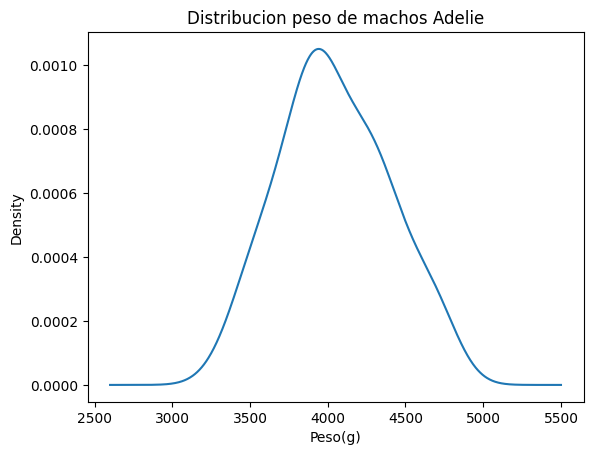

In [31]:
Adelie_macho['body_mass_g'].plot.kde().set(title='Distribucion peso de machos Adelie', xlabel='Peso(g)')

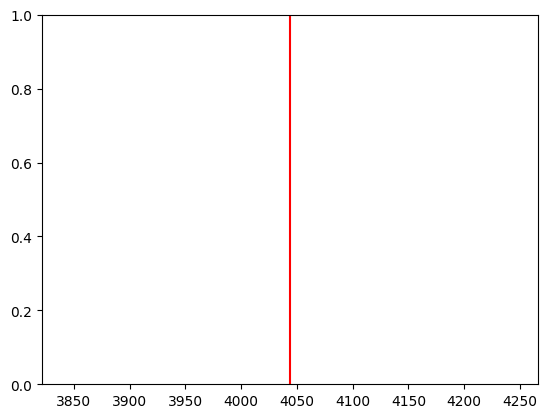

In [32]:
plt.axvline(x = media_masa, color='red')

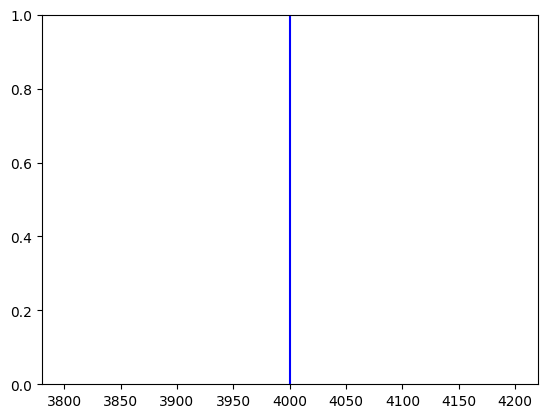

In [33]:
plt.axvline(x = mediana_masa, color = 'blue')

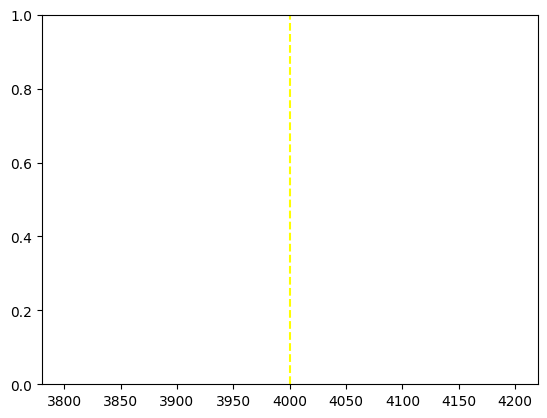

In [34]:
plt.axvline(x = cuantil_50_masa,color='yellow', linestyle='--')

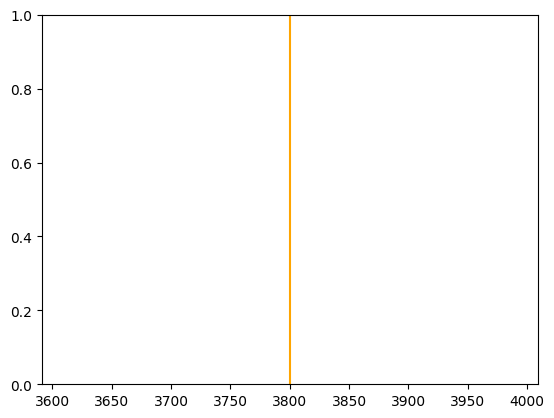

In [35]:
plt.axvline(x = cuantil_25_masa, color='orange')

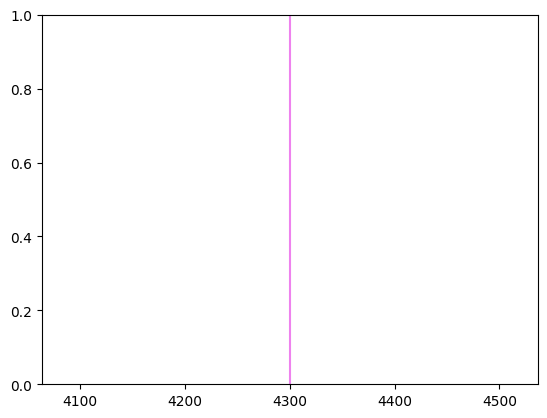

In [36]:
plt.axvline(x = cuantil_75_masa, color='violet')

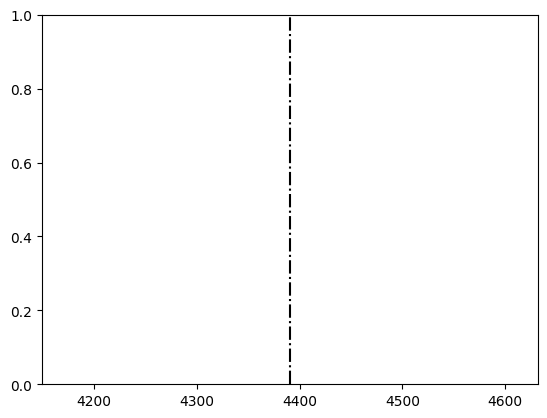

In [37]:
plt.axvline(x = media_masa+desvio , color='black' , linestyle = '-.')

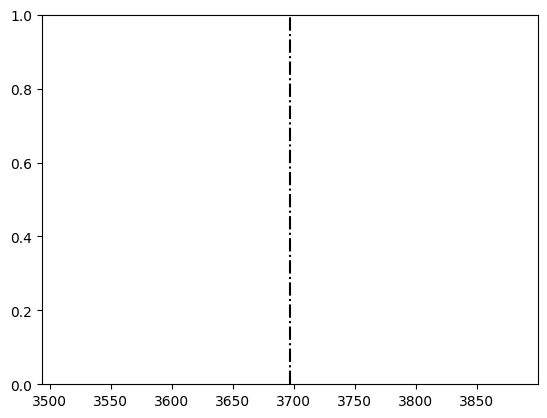

In [38]:
plt.axvline(x = media_masa-desvio , color='black' , linestyle = '-.')

In [39]:
plt.show()

In [40]:
plt.close()

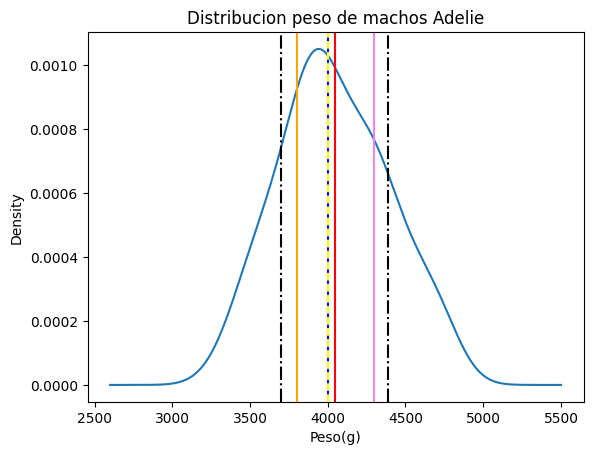

In [41]:
Adelie_macho['body_mass_g'].plot.kde().set(title='Distribucion peso de machos Adelie', xlabel='Peso(g)')

plt.axvline(x = media_masa, color='red')

plt.axvline(x = mediana_masa, color = 'blue')

plt.axvline(x = cuantil_50_masa,color='yellow', linestyle='--')

plt.axvline(x = cuantil_25_masa, color='orange')

plt.axvline(x = cuantil_75_masa, color='violet')

plt.axvline(x = media_masa+desvio , color='black' , linestyle = '-.')

plt.axvline(x = media_masa-desvio , color='black' , linestyle = '-.')

plt.show()

plt.close()


##Por ejemplo...cuantos pinguinos hay por isla??

In [42]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

##todo muy lindo, pero esto es una tabla, y graficamente? como podria verlo?  una buena herramienta son los graficos de barras

[Text(0.5, 1.0, 'Pinguinos por isla')]

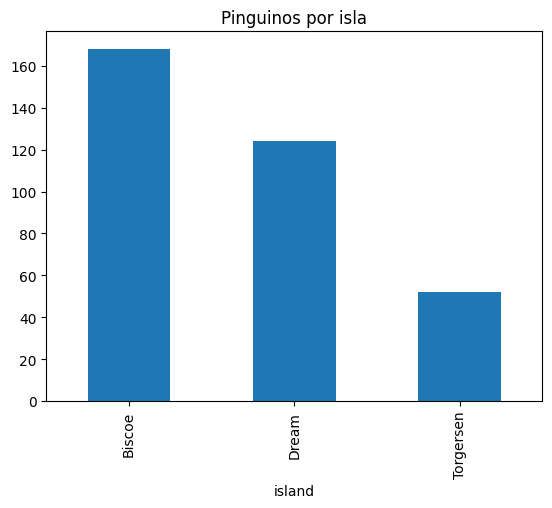

In [43]:
df['island'].value_counts().plot.bar().set(title='Pinguinos por isla')

In [44]:
plt.show()

In [45]:
plt.close()

<Axes: ylabel='Density'>

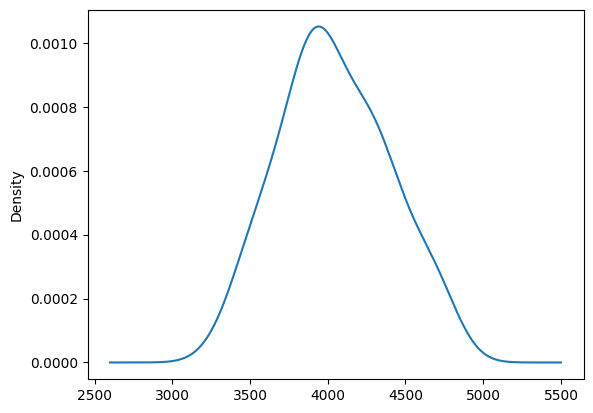

In [46]:
Adelie_macho['body_mass_g'].plot.kde()

##podriamos preguntarnos, cual es la distribucion de los pesos de los
##pinguinos?

##jugar con los bins, que pasa si ponen menos, y si ponen mas?

##y si los bins tienden a infinito??
##es decir, si el bin tiene a agarrar solo u valor??

##df.plot.hist(bins = )

##kind --> es el tipo de gráfico, en este caso un histograma, en donde se le pone como xlabel = masa

[Text(0.5, 0, 'masa(g)')]

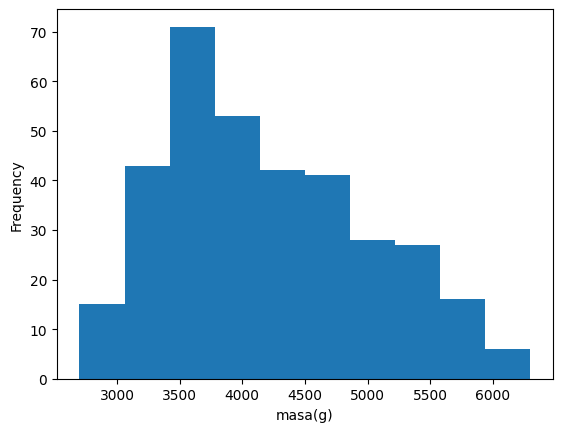

In [47]:
df['body_mass_g'].plot(kind = 'hist').set(xlabel = 'masa(g)')

In [48]:
plt.show()

In [49]:
plt.close()

Un KDE (Kernel Density Estimation), o estimación de densidad mediante núcleo, es una técnica utilizada para estimar la función de densidad de probabilidad (PDF) de un conjunto de datos. Es una forma suave de visualizar la distribución de los datos, en contraste con el histograma, que tiene una apariencia más discreta.

¿Cómo funciona el KDE?
En lugar de dividir los datos en intervalos como en un histograma, el KDE coloca una "curva" suave (denominada núcleo, o kernel) alrededor de cada dato.
Estas curvas se suman para formar una estimación continua de la densidad de probabilidad.
La forma y el ancho de la curva dependen del núcleo elegido (por ejemplo, gaussiano) y del parámetro de ancho de banda (bandwidth), que controla qué tan suave es la estimación.
Aplicaciones del KDE
Visualizar distribuciones de datos en forma continua.
Comparar distribuciones sin preocuparse por la elección de intervalos (como en un histograma).
Identificar modas (peaks) y patrones en los datos.

[Text(0.5, 0, 'masa(g)')]

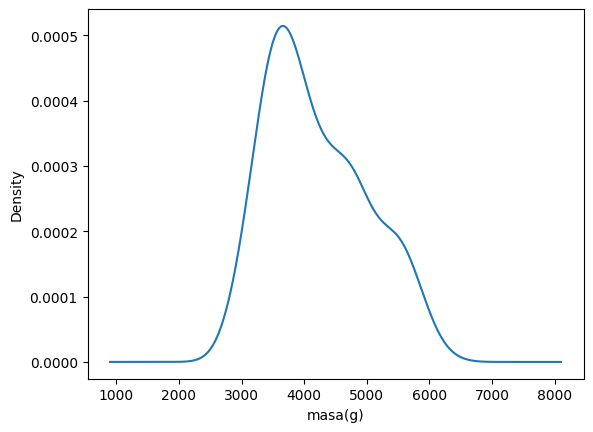

In [51]:
df['body_mass_g'].plot(kind = 'kde').set(xlabel = 'masa(g)')

In [52]:
plt.show()

In [53]:
plt.close()

pareciera tener varios picos, valdra la pena preguntarse por especie?

probemos graficando con una herramienta mas poderosa, y versatil
que nos permite especificar con ciertos parametros, lo que queremos
graficar, y nos va a ser muy util.

[Text(0.5, 0, 'masa(g)')]

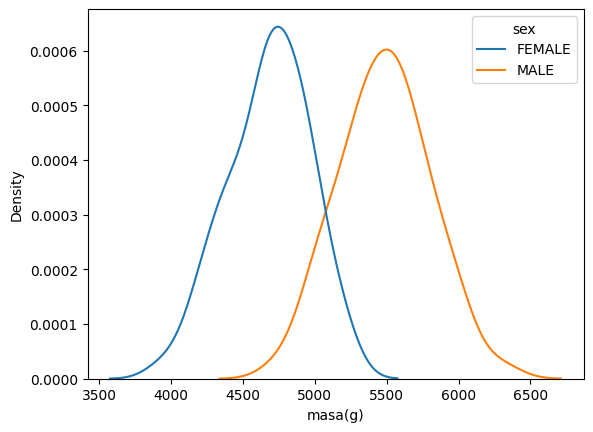

In [54]:
sns.kdeplot(data = df[df['species'] == 'Gentoo'] , x = 'body_mass_g' , hue = 'sex').set(xlabel = 'masa(g)')

In [55]:
plt.show()

In [56]:
plt.close()

SNS

En el contexto de Python para visualización de datos, sns es la abreviatura comúnmente usada al importar la biblioteca Seaborn. Seaborn es una biblioteca de visualización basada en Matplotlib que ofrece una interfaz más amigable y atractiva para crear gráficos estadísticos.

¿Qué es Seaborn?
Seaborn es una biblioteca que facilita la creación de gráficos con funciones diseñadas para manejar conjuntos de datos complejos. Está especialmente optimizada para trabajar con estructuras de datos de Pandas y es ampliamente utilizada en análisis exploratorios y representaciones estadísticas.

Características principales de Seaborn
Estilización avanzada:
Gráficos con estilos más modernos y claros que los de Matplotlib por defecto.
Integración con Pandas:
Admite directamente DataFrames y columnas, simplificando la visualización de datos tabulares.
Gráficos estadísticos preconfigurados:
Incluye gráficos como KDE, histogramas, boxplots, violin plots, heatmaps, entre otros.
Paletas de colores personalizables:
Ofrece paletas de colores listas para usar y soporte para personalización avanzada.
Soporte para relaciones estadísticas:
Gráficos como pairplot o lmplot pueden mostrar relaciones entre múltiples variables.

kdeplot es una función de la biblioteca Seaborn que se utiliza para crear gráficos de Kernel Density Estimation (KDE), o estimación de densidad mediante núcleo. Es una herramienta para visualizar la distribución de datos en forma continua, generando una curva suave que representa la densidad de probabilidad.

[Text(0.5, 0, 'masa(g)')]

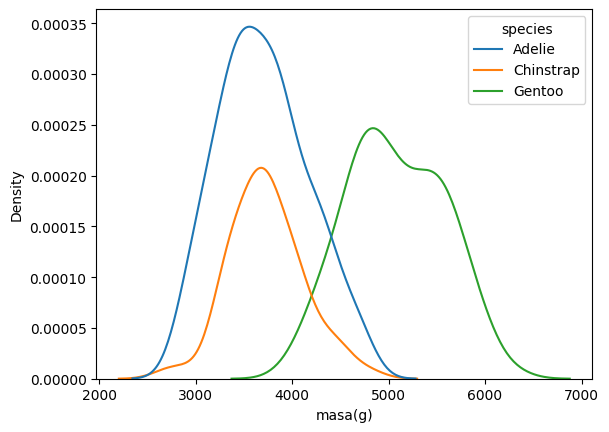

In [57]:
sns.kdeplot(x = df['body_mass_g'], hue = df['species']).set(xlabel = 'masa(g)')

In [58]:
plt.show()

In [59]:
plt.close()

por que no nos disponems a ver si en alguna especie, y vemos que pasa con los sexos, seran distintos?

En el contexto de Seaborn, el parámetro "hue" se utiliza para diferenciar subgrupos dentro de un conjunto de datos y representarlos con distintos colores en un gráfico. Esto permite visualizar cómo una variable categórica afecta la relación entre otras dos o más variables en el mismo gráfico.

[Text(0.5, 0, 'especie'), Text(0, 0.5, 'masa(g)')]

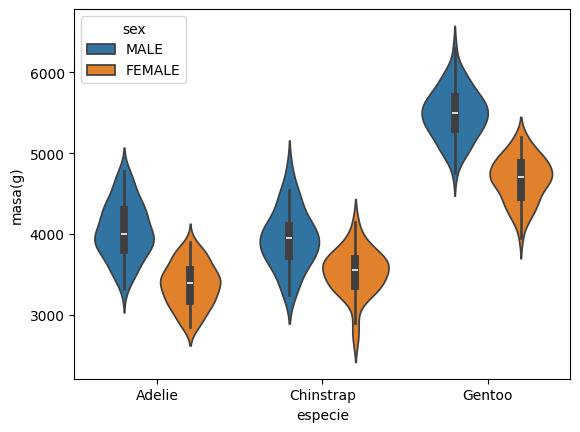

In [60]:
sns.violinplot(data = df ,
               x = 'species' , y = 'body_mass_g' , hue = 'sex').set(xlabel = 'especie' , ylabel='masa(g)')

In [61]:
plt.show()

In [62]:
plt.close()

ya si quisieramos ver relaciones entre variables, puede resultar conveniente ir a otro tipo de graficos, como los de dispercion
 o scatter plot...

In [63]:
adelie = df[(df['species']=='Adelie')]

<Axes: xlabel='body_mass_g', ylabel='Density'>

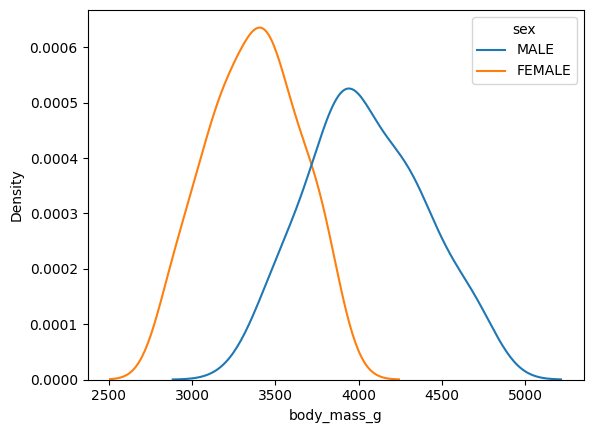

In [64]:
sns.kdeplot(data=adelie, x='body_mass_g', hue='sex')


[Text(0.5, 0, 'Largo aleta(cm)'), Text(0, 0.5, 'masa(g)')]

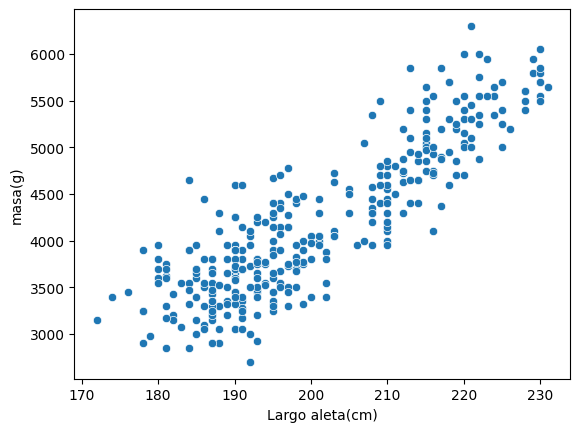

In [65]:
sns.scatterplot(data = df , x = 'flipper_length_mm', y = 'body_mass_g').set(xlabel = 'Largo aleta(cm)' , ylabel = 'masa(g)')

In [66]:
plt.show()

In [67]:
plt.close()

#parece una buena relacion, pero fue una buena idea no diferenciar por
#sexo? o por especie?
#veamos...

[Text(0.5, 0, 'Largo aleta(cm)'), Text(0, 0.5, 'masa(g)')]

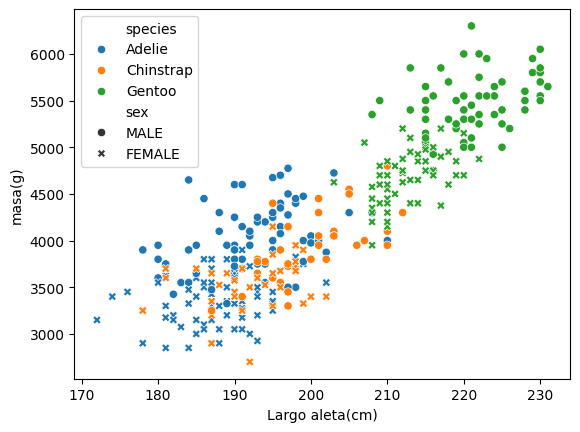

In [68]:
sns.scatterplot(data = df , x = 'flipper_length_mm', y = 'body_mass_g' , hue = 'species' , style = 'sex').set(xlabel = 'Largo aleta(cm)' , ylabel = 'masa(g)')

In [69]:
plt.show()

In [70]:
plt.close()

[Text(0.5, 0, 'Largo aleta(cm)'), Text(0, 0.5, 'masa(g)')]

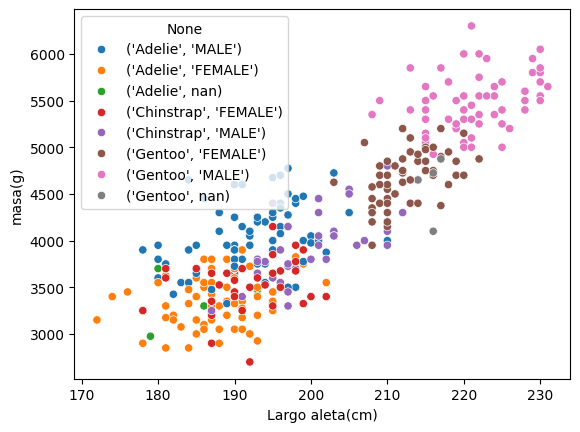

In [71]:
sns.scatterplot(data = df , x = 'flipper_length_mm', y = 'body_mass_g' , hue = (df[['species','sex']].apply(tuple, axis=1))).set(xlabel = 'Largo aleta(cm)' , ylabel = 'masa(g)')

In [72]:
plt.show()

In [73]:
plt.close()

con esta visualizacion, podemos ver hasta 4 variables en juego en un grafico 2D

bueno, por loque se ve, una recta ajustaria bastante bien a esos datos, no?

probemos graficar con un ajuste lineal, a ver que pinta tienen...

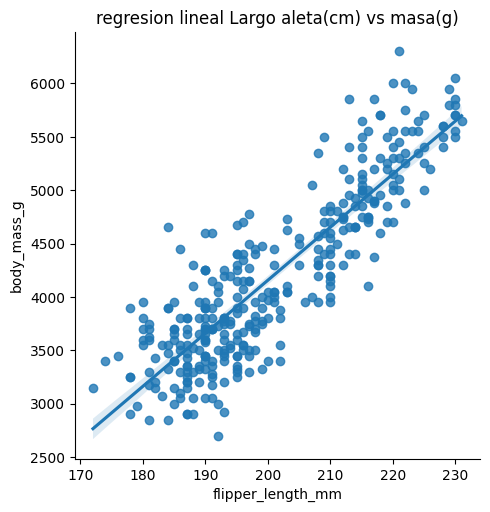

In [74]:
sns.lmplot(data=df, x='flipper_length_mm', y='body_mass_g').set(title = 'regresion lineal Largo aleta(cm) vs masa(g)')

plt.show()

In [75]:
plt.close()

ah, y si mejor separamos por sexos??

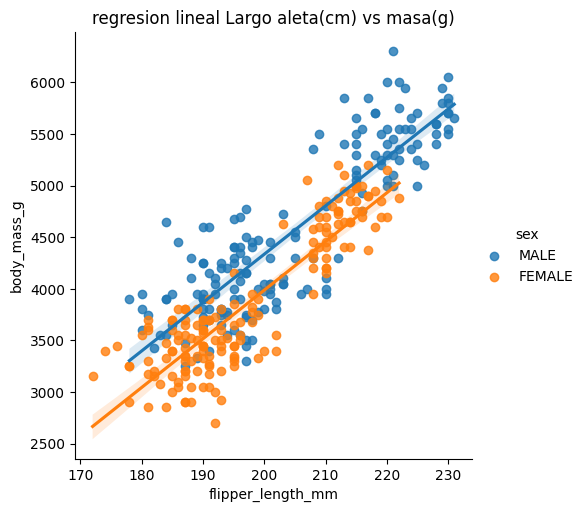

In [76]:
sns.lmplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='sex').set(title = 'regresion lineal Largo aleta(cm) vs masa(g)')

In [77]:
plt.show()

In [78]:
plt.close()

Homework: les dejo la tarea de agarrar a cada especie,
 y graficar rectas separando por sexo...


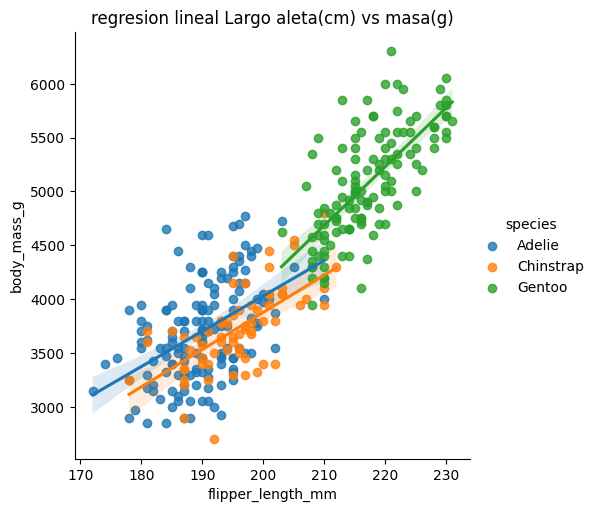

In [79]:
sns.lmplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species').set(title = 'regresion lineal Largo aleta(cm) vs masa(g)')

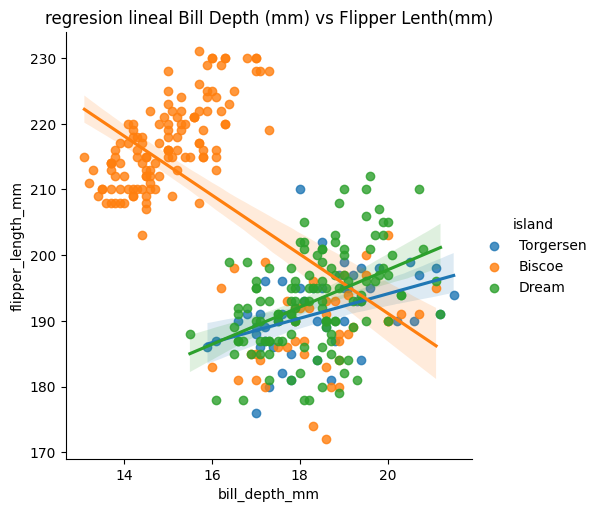

In [80]:
sns.lmplot(data=df, x='bill_depth_mm', y='flipper_length_mm', hue='island').set(title = 'regresion lineal Bill Depth (mm) vs Flipper Lenth(mm)')

y si quisiera ver las relaciones entre multiples variables?
de una sola vez?
Bueno!!!  existe una herrmaienta para ello...

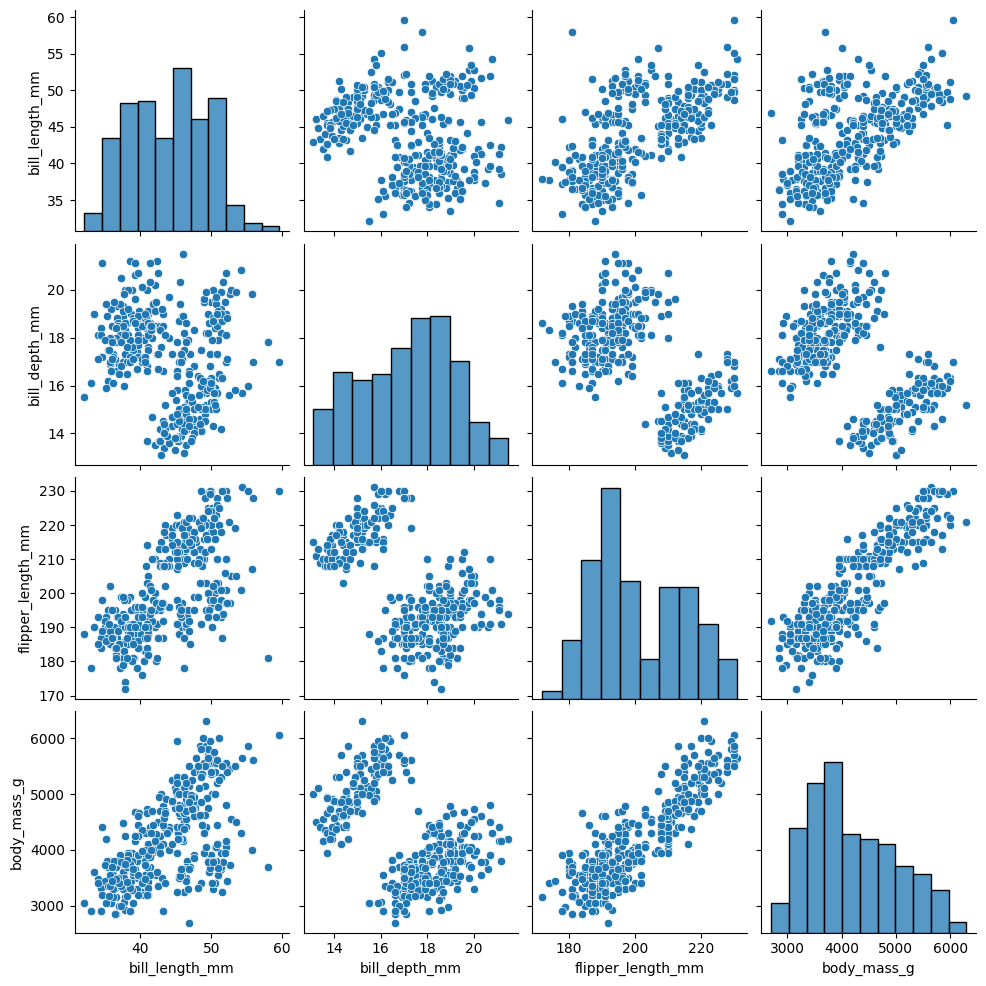

In [81]:
sns.pairplot(data = df)

aca vemos que hace scatter fuera de la diagonal, y en esta, hist
ven que fuera del a diagonal, la informacion es redundante??

habra manera de aprobechar esto??

bueno, la hay!!

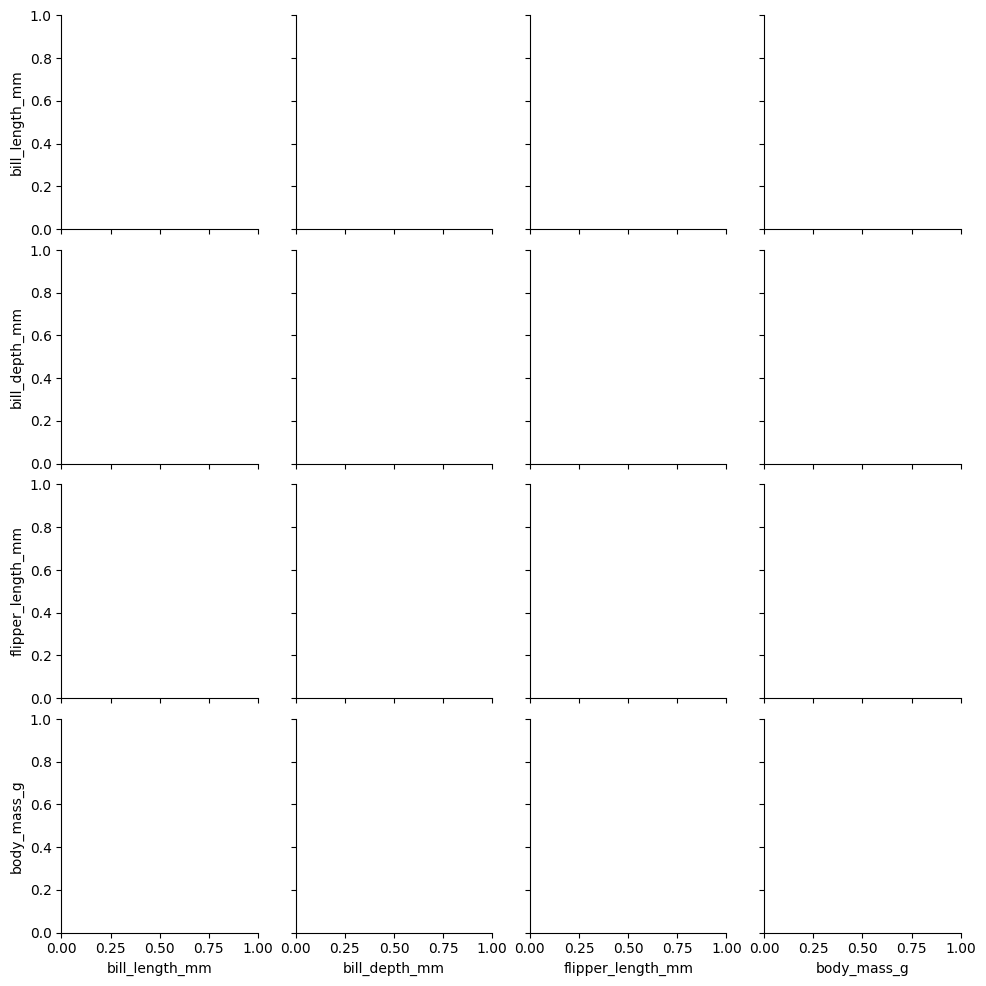

In [82]:
plot = sns.PairGrid(df)

In [83]:
plot.map_diag(sns.histplot)

In [84]:
plot.map_upper(sns.scatterplot)

In [85]:
plot.map_lower(sns.kdeplot)

En realidad lo de arriba está mal porque tenía haber corrido todo junto en una sola celda... lo mejor sería así:

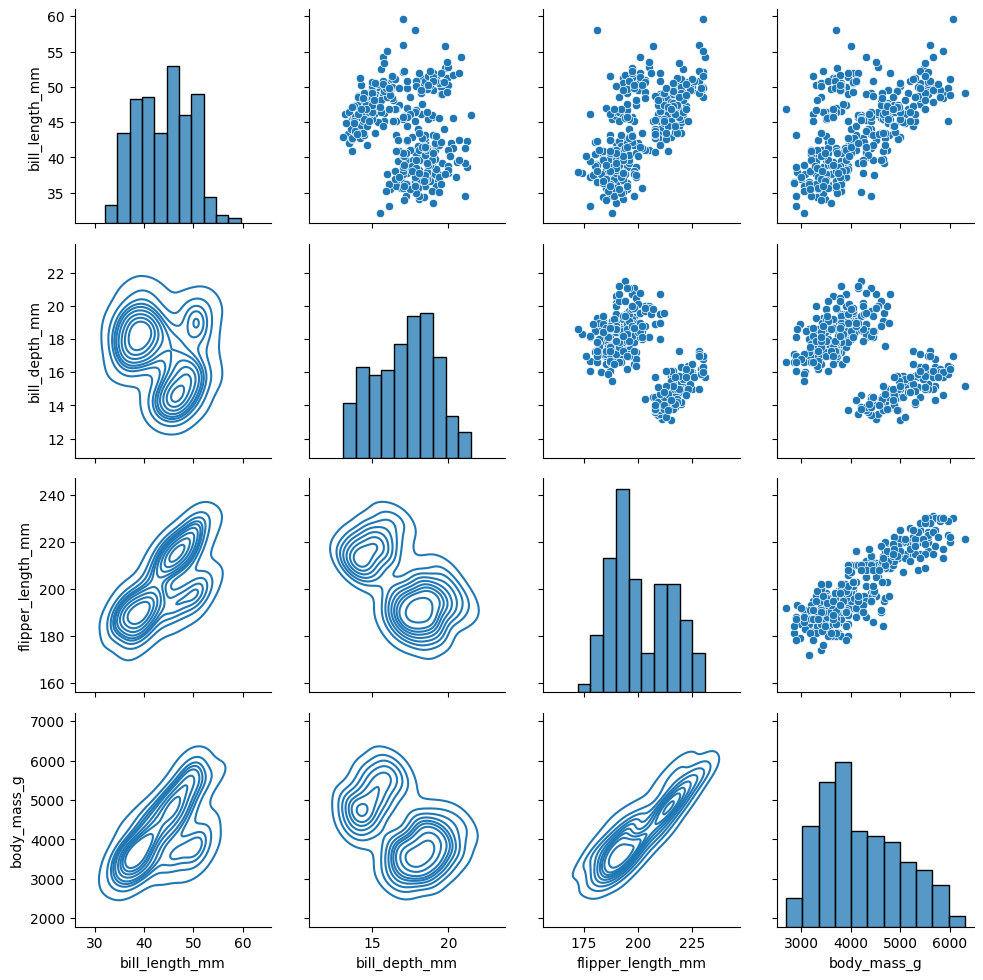

In [86]:
plot = sns.PairGrid(df)

plot.map_diag(sns.histplot)#histograma en la diagonal

plot.map_upper(sns.scatterplot)

plot.map_lower(sns.kdeplot)

####y diferenciados por especie?? funcionara???



y diferenciados por especie?? funcionara???

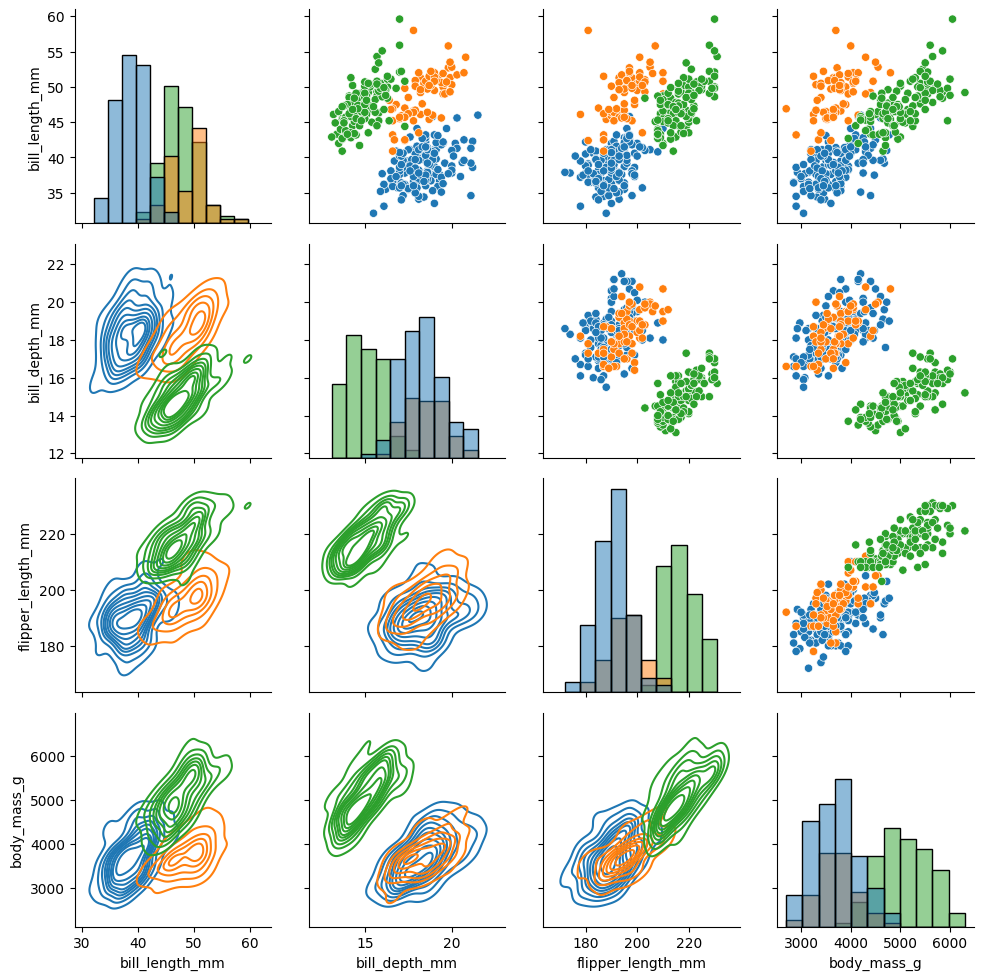

In [87]:
plot = sns.PairGrid(data = df , hue = 'species')

plot.map_diag(sns.histplot)#histograma en la diagonal

plot.map_upper(sns.scatterplot)

plot.map_lower(sns.kdeplot)

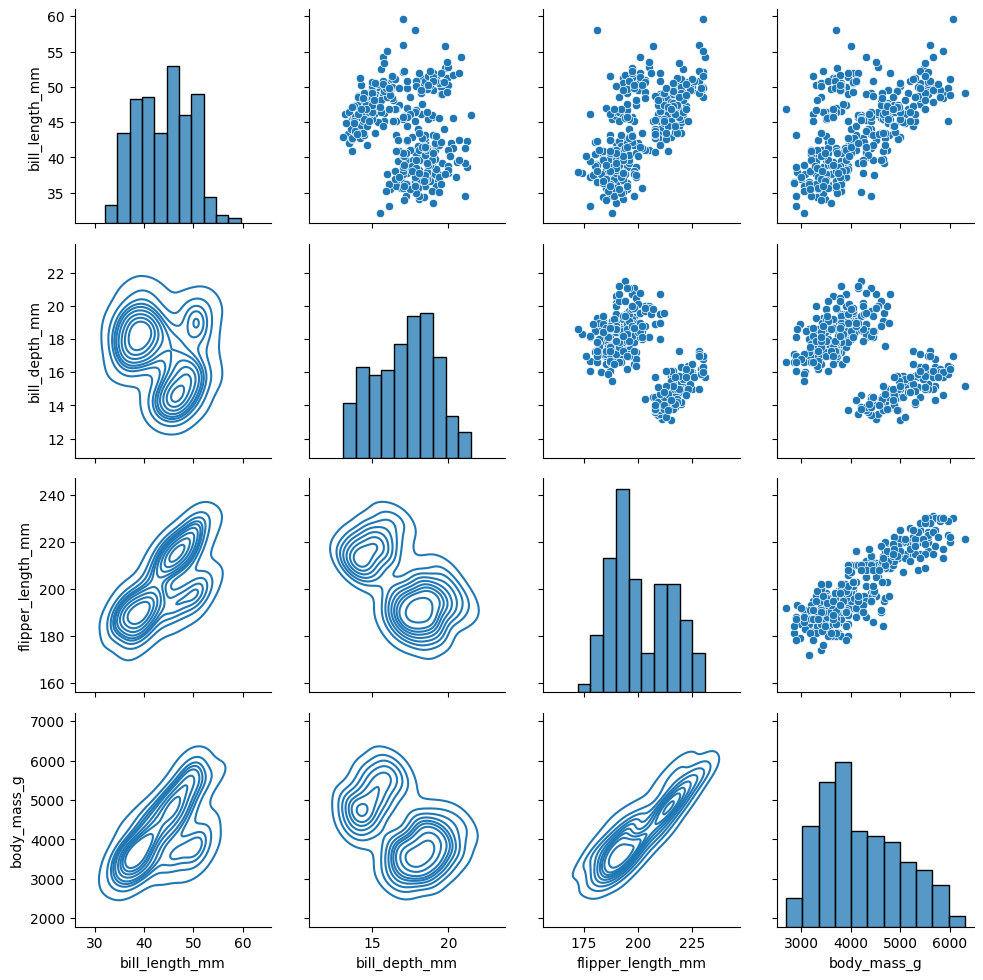

In [88]:
plot = sns.PairGrid(df)

plot.map_diag(sns.histplot)#histograma en la diagonal

plot.map_upper(sns.scatterplot)

plot.map_lower(sns.kdeplot)

In [89]:
# Seleccionar solo columnas numéricas
df_numerico = df.select_dtypes(include=["number"])

# Calcular la correlación
correlacion = df_numerico.corr()
print(correlacion)

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


Un poco de teoría sobre correlación: 

La función corr() en pandas calcula la correlación entre columnas numéricas de un DataFrame. La correlación mide la relación entre dos variables y qué tan bien una puede predecir a la otra. Este cálculo puede usar varios métodos (por defecto, Pearson).

Concepto de correlación
Definición:

La correlación indica la intensidad y dirección de la relación lineal entre dos variables.
El coeficiente de correlación varía entre -1 y 1:
1: Relación lineal positiva perfecta.
-1: Relación lineal negativa perfecta.
0: Sin relación lineal.
Tipos de correlación (los más comunes):

Pearson: Evalúa relaciones lineales entre variables. Es sensible a valores atípicos.
Spearman: Evalúa relaciones monótonas basándose en los rangos de los datos. Útil si no se cumple la linealidad.
Kendall: Evalúa la relación monótona como una proporción de concordancia entre pares. Es más robusto en conjuntos de datos pequeños.
Cómo interpreta los resultados
Coeficientes cercanos a 1: Una variable aumenta cuando la otra también lo hace. Ejemplo: Altura y peso (en general, más altura significa más peso).

Coeficientes cercanos a -1: Una variable disminuye cuando la otra aumenta. Ejemplo: Velocidad de un coche y tiempo para llegar a destino.

Coeficientes cercanos a 0: Indican poca o ninguna relación lineal. Ejemplo: Número de zapatos que tienes y el clima.

Cálculo de correlación (fórmula de Pearson)
Dado dos variables 



<Axes: >

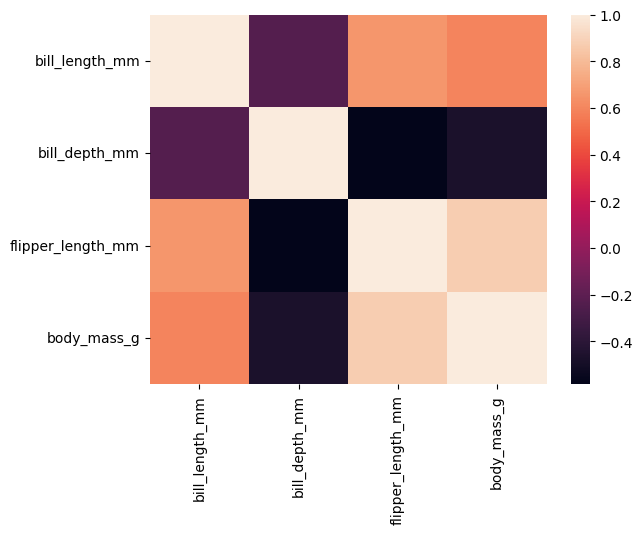

In [90]:
#y como verlo? bueno, para este tipo de cosas estan los heatmap

sns.heatmap(correlacion)

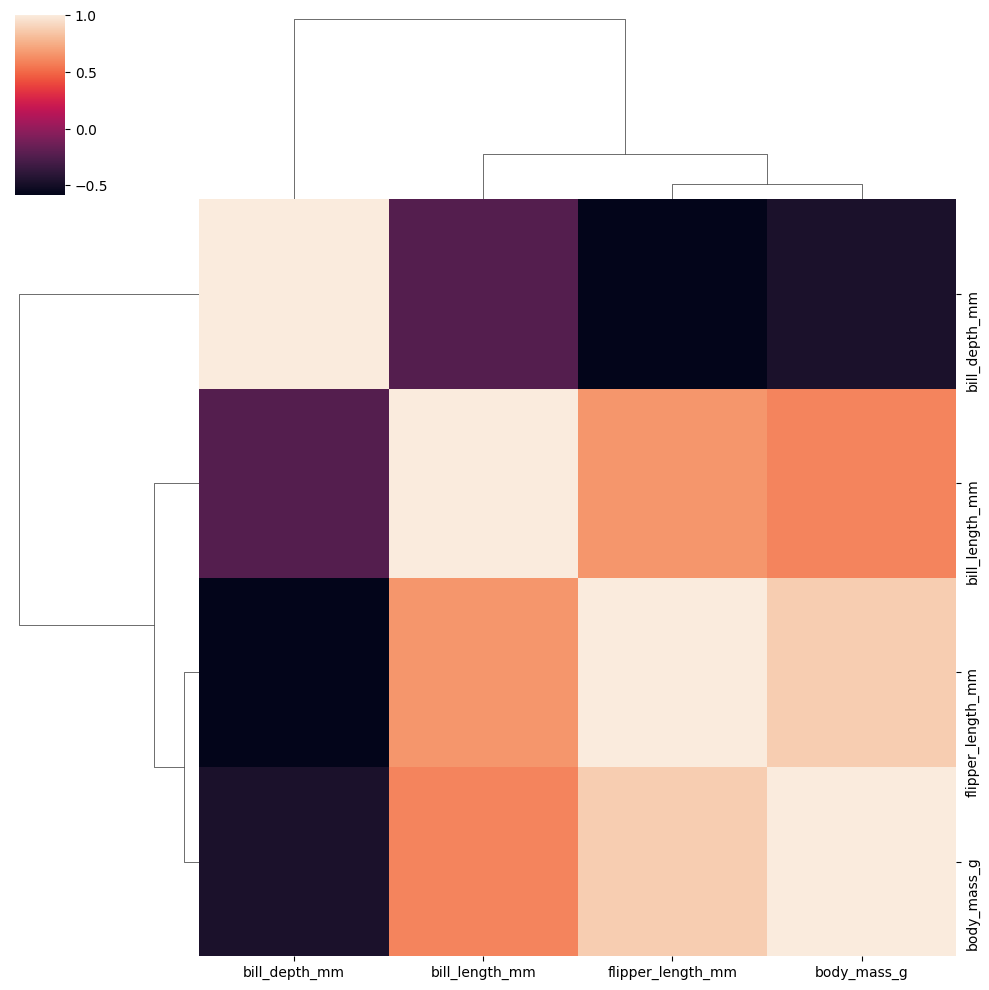

In [91]:
#y si ademas quisiera ver relaciones jerarquicas entre variables?

sns.clustermap(correlacion)

#hay algun metodo para agrupar-ver si las especies son diferenciables
#facil-rico-barato? en solo dos dimensiones, teniendo en cuenta
#varias variables a la vez???

#bueno, si, es un metodo llamado PCA!!!

PCA: En el mundo del álgebra y las ciencias de datos, PCA (del inglés Principal Component Analysis, o Análisis de Componentes Principales) es una técnica de reducción de dimensionalidad ampliamente utilizada. Su propósito principal es simplificar conjuntos de datos complejos mientras se conserva la mayor cantidad posible de información relevante.

Concepto básico
PCA transforma un conjunto de datos original en un nuevo sistema de coordenadas, llamado componentes principales. Cada componente principal es una combinación lineal de las variables originales, ordenadas según la cantidad de varianza que explican en los datos.

Definiciones clave
Espacio original:

Los datos se representan como puntos en un espacio de muchas dimensiones (tantas como variables haya).
Varianza:

La dispersión de los datos. PCA identifica las direcciones en las que los datos varían más.
Componentes principales:

Ejes en el nuevo sistema de coordenadas que maximizan la varianza de los datos. El primer componente principal (PC1) es la dirección en la que los datos tienen mayor varianza; el segundo (PC2) es ortogonal al primero y maximiza la varianza restante, y así sucesivamente.
Reducción de dimensionalidad:

En lugar de usar todas las dimensiones originales, puedes elegir las primeras componentes principales (las más informativas) para trabajar con un subconjunto reducido de dimensiones.
Matemáticamente, cómo funciona PCA
Estandarización de los datos:

Se asegura que todas las variables tengan la misma escala (por ejemplo, media 0 y desviación estándar 1).
Cálculo de la matriz de covarianza:

Describe las relaciones lineales entre las variables originales.
Cálculo de los autovalores y autovectores:

Los autovectores representan las direcciones (componentes principales).
Los autovalores indican cuánta varianza explica cada componente.
Proyección de los datos:

Los datos originales se proyectan sobre los nuevos ejes (los autovectores) para obtener las coordenadas en el espacio de los componentes principales.
Ejemplo visual
Imagina un conjunto de puntos en un plano 2D (x, y). La PCA buscaría una línea (PC1) que atraviese el centro de los puntos y explique la mayor parte de la dispersión de estos datos. Luego, buscaría una segunda línea ortogonal a la primera (PC2) que explique la varianza restante.

Usos prácticos de PCA
Reducción de dimensionalidad:

Facilita el análisis y la visualización de datos complejos con muchas variables.
Preprocesamiento para modelos:

Mejora el rendimiento y la velocidad de algoritmos de aprendizaje automático.
Eliminación de ruido:

Ayuda a identificar patrones clave y eliminar características menos relevantes.
Visualización:

Reduce datos de alta dimensionalidad (por ejemplo, 100 variables) a 2 o 3 dimensiones para facilitar su visualización.


In [92]:
from sklearn.decomposition import PCA

import numpy as np



[Text(0.5, 0, 'Componente 1'), Text(0, 0.5, 'Componente 2')]

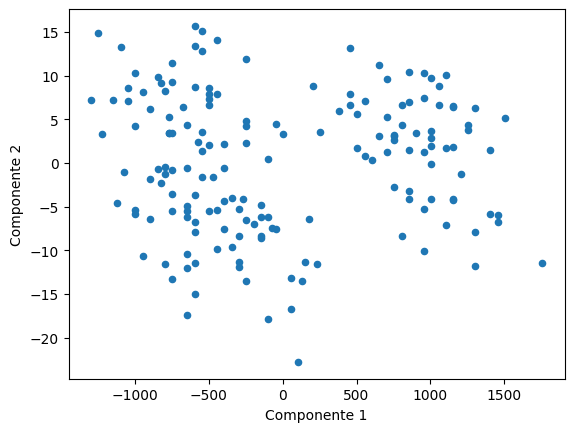

In [95]:
#voy a aplicar el metodo solo a un subconjunto de los datos,
#por simplicidad, solo me quedo con machos de las tres especies


###aca una reducicionde la dimencionalidad, a ver si conserva 
#cierta capacidad de discriminar

X = df[(df['sex']=='MALE')].loc[: , ['bill_length_mm',
'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

pca = PCA(n_components=2)

matriz_pca = pca.fit_transform(X)

pd.DataFrame(matriz_pca).plot(x = 0 , y = 1 , kind = 'scatter').set(xlabel = 'Componente 1' , ylabel = 'Componente 2')

[Text(0.5, 0, 'Componente 1'), Text(0, 0.5, 'Componente 2')]

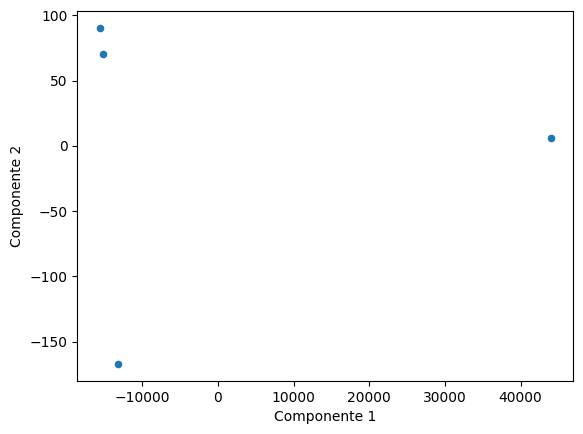

In [96]:
#################aca una suerte de clustering hecho a mano

X = df[(df['sex']=='MALE')].loc[: , ['bill_length_mm',
'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

pca = PCA(n_components=2)

matriz_pca = pca.fit_transform(X.T)

pd.DataFrame(matriz_pca).plot(x = 0 , y=1 , kind = 'scatter').set(xlabel = 'Componente 1' , ylabel = 'Componente 2')


<Axes: xlabel='island', ylabel='count'>

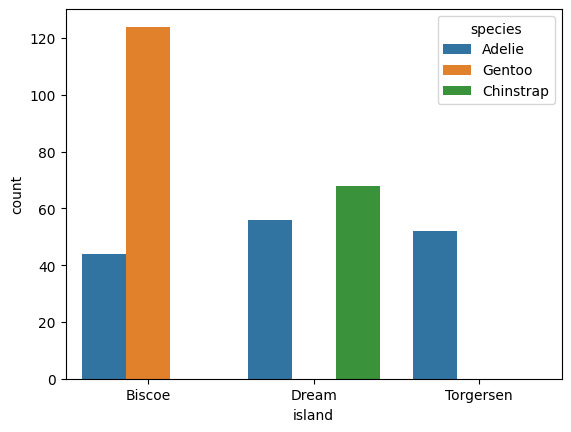

In [97]:
#pinguinos por isla

por_isla = df.groupby(['island','species']).size().reset_index(name='count')

sns.barplot(data = por_isla , x = 'island' , y = 'count' , hue = 'species')

In [99]:
##########hasta aca venia algo medio descriptivo...

####ahora se vienen modelos para clasificar posta...

#Arrancamos con LR

#mi objetivo, es sexar pinguinos de una dada especie, mediante el uso de regresion logistica

#separo un df por especie...

adelie = df[(df['species']=='Adelie')].loc[: , ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 
'body_mass_g', 'sex']]

chin = df[(df['species']=='Chinstrap')].loc[: , ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 
'body_mass_g', 'sex']]

gentoo = df[(df['species']=='Gentoo')].loc[: , ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 
'body_mass_g', 'sex']]

La función .loc en pandas es un método utilizado para seleccionar datos en un DataFrame o Series basándose en etiquetas de filas y columnas. Es extremadamente flexible y permite seleccionar subconjuntos de datos usando etiquetas o condiciones lógicas.

In [100]:
#primero cambio los valores, para pdoer usar regresion logistica

#la funcion CerosUnos(dataframe , columna) toma un df y una col, y le aplica a esa col la conversion de
#female a 1 , y de male a 0

def CerosUnos(dataframe , columna):
    
    dataframe[columna] = dataframe[columna].map({'FEMALE':1 , 'MALE':0})
    
    return(dataframe)

CerosUnos(chin , 'sex')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,46.5,17.9,192.0,3500.0,1
153,50.0,19.5,196.0,3900.0,0
154,51.3,19.2,193.0,3650.0,0
155,45.4,18.7,188.0,3525.0,1
156,52.7,19.8,197.0,3725.0,0
...,...,...,...,...,...
215,55.8,19.8,207.0,4000.0,0
216,43.5,18.1,202.0,3400.0,1
217,49.6,18.2,193.0,3775.0,0
218,50.8,19.0,210.0,4100.0,0


In [101]:
#chequeo
chin['sex']

152    1
153    0
154    0
155    1
156    0
      ..
215    0
216    1
217    0
218    0
219    1
Name: sex, Length: 68, dtype: int64

In [104]:
####genero otra funcion que calcula el ratio entre dos variables, y genera una
#nueva columna con dicho ratio

def ratio(dataframe , columna1 , columna2):
    
    dataframe['bill_ratio'] = dataframe[columna1]/dataframe[columna2]
    
    return(dataframe)

ratio(chin , 'bill_length_mm' , 'bill_depth_mm')

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve

In [105]:
# la idea es usar esto... fpr, tpr, thresholds = metrics.roc_curve(y, scores)
#oara graficar curva roc es tpr vs fpr
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(

chin.loc[: , ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g' , 'bill_ratio']] ,
chin.loc[:,['sex']],

test_size = 0.2 , random_state = 524)

print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(54, 5) (14, 5) (54, 1) (14, 1)


In [106]:
#pienso hacer una regresion logistica para bill_length , bill depth , flipper_ length , body_mass ,
#bill_ratio , por separado, y luego tomar alguna desicion

from sklearn.linear_model import LogisticRegression

reg_largo_pico = LogisticRegression()

reg_profundidad_pico = LogisticRegression()

reg_ratio_pico = LogisticRegression()

reg_largo_aleta = LogisticRegression()

reg_masa = LogisticRegression()

reg_largo_pico.fit(np.asarray(X_train['bill_length_mm']).reshape(-1 , 1) , np.asarray(y_train).ravel())

reg_profundidad_pico.fit(np.asarray(X_train['bill_depth_mm']).reshape(-1 , 1) , np.asarray(y_train).ravel())

reg_ratio_pico.fit(np.asarray(X_train['bill_ratio']).reshape(-1 , 1) , np.asarray(y_train).ravel())

reg_largo_aleta.fit(np.asarray(X_train['flipper_length_mm']).reshape(-1 , 1) , np.asarray(y_train).ravel())

reg_masa.fit(np.asarray(X_train['body_mass_g']).reshape(-1 , 1) , np.asarray(y_train).ravel())
#hasta aca fitie todos los modelos, queda usarlos, y graficar


LogisticRegression()

In [107]:
#hasta aca fitie todos los modelos, queda usarlos, y graficar

#entonces ahora, ya puedo predecir las probabilidades, para graficar un poco

largo_pico_proba = reg_largo_pico.predict_proba(np.asarray(X_test['bill_length_mm']).reshape(-1 , 1))

profundidad_pico_proba = reg_profundidad_pico.predict_proba(np.asarray(X_test['bill_depth_mm']).reshape(-1 , 1))

ratio_pico_proba = reg_ratio_pico.predict_proba(np.asarray(X_test['bill_ratio']).reshape(-1 , 1))

largo_aleta_proba = reg_largo_aleta.predict_proba(np.asarray(X_test['flipper_length_mm']).reshape(-1 , 1))

masa_proba = reg_masa.predict_proba(np.asarray(X_test['body_mass_g']).reshape(-1 , 1))

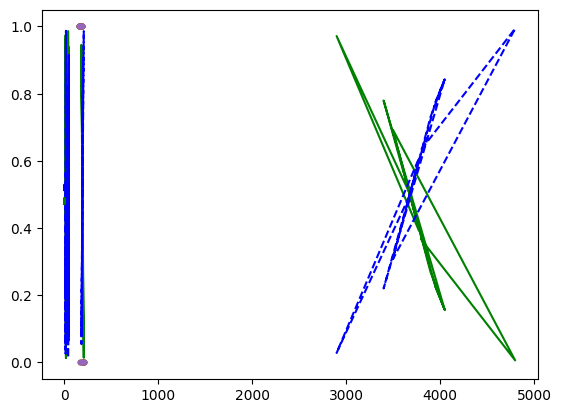

In [115]:
#hasta aca fitie todos los modelos, queda usarlos, y graficar

#entonces ahora, ya puedo predecir las probabilidades, para graficar un poco

largo_pico_proba = reg_largo_pico.predict_proba(np.asarray(X_test['bill_length_mm']).reshape(-1 , 1))

profundidad_pico_proba = reg_profundidad_pico.predict_proba(np.asarray(X_test['bill_depth_mm']).reshape(-1 , 1))

ratio_pico_proba = reg_ratio_pico.predict_proba(np.asarray(X_test['bill_ratio']).reshape(-1 , 1))

largo_aleta_proba = reg_largo_aleta.predict_proba(np.asarray(X_test['flipper_length_mm']).reshape(-1 , 1))

masa_proba = reg_masa.predict_proba(np.asarray(X_test['body_mass_g']).reshape(-1 , 1))

#####grafico las probabilidades, a ver si hay alguna diferencia...
####cueationable, estaria mejor hacer las curvas roc
plt.plot(np.asarray(X_test['bill_length_mm']).reshape(-1 , 1), largo_pico_proba[:, 1], "g-", label="Female")
plt.plot(np.asarray(X_test['bill_length_mm']).reshape(-1 , 1), largo_pico_proba[:, 0], "b--", label="Male")
plt.plot(y_test , ".")

####
plt.plot(np.asarray(X_test['bill_depth_mm']).reshape(-1 , 1), profundidad_pico_proba[:, 1], "g-", label="Female")
plt.plot(np.asarray(X_test['bill_depth_mm']).reshape(-1 , 1), profundidad_pico_proba[:, 0], "b--", label="Male")
plt.plot(y_test , ".")

###
plt.plot(np.asarray(X_test['bill_ratio']).reshape(-1 , 1), ratio_pico_proba[:, 1], "g-", label="Female")
plt.plot(np.asarray(X_test['bill_ratio']).reshape(-1 , 1), ratio_pico_proba[:, 0], "b--", label="Male")
plt.plot(y_test , ".")

###
plt.plot(np.asarray(X_test['flipper_length_mm']).reshape(-1 , 1), largo_aleta_proba[:, 1], "g-", label="Female")
plt.plot(np.asarray(X_test['flipper_length_mm']).reshape(-1 , 1), largo_aleta_proba[:, 0], "b--", label="Male")
plt.plot(y_test , ".")

####
plt.plot(np.asarray(X_test['body_mass_g']).reshape(-1 , 1), masa_proba[:, 1], "g-", label="Female")
plt.plot(np.asarray(X_test['body_mass_g']).reshape(-1 , 1), masa_proba[:, 0], "b--", label="Male")
plt.plot(y_test , ".")